# **Milestone 1**

## **Context**
 - Why is this problem important to solve?
 
 This problem is important to solve because customer segmentation is a crucial aspect of marketing operations for businesses and organizations.  By dividing a dataset of customers into groups of similar customers based on specific common characteristics, we can better understand the various needs and motivations of customers.  Customer segmentation allows businesses and organizations to achieve efficient marketing efforts and obtain better return on investment because it allows them to know how to effectively use their money, time, and other resources to target the correct customer groups and create a personalized experience.

### **The objectives:**

 - What is the intended goal?
 
 The intended goal of customer segmentation is to divide the dataset of customers into groups based on certain common characteristics.  The customer groups created will highlight the unique needs, motivations, and interests, which can then be used by businesses and organizations to implement an efficient marketing strategy.

### **The key questions:**

- What are the key questions that need to be answered?

The key questions that need to be answered include the following:
- Are there any issues with the data that we need to address before analyzing?
- Which variables should we use for clustering?
- What characteristics are common among the customers in the dataset to create customer groups?
- What variables can we create to further analyze the data?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to create customer groups based on similar characteristics among the customers in the dataset so we can effectively target customer segments and create customized communications and offerings.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Check the shape of the data**

In [3]:
# Print the shape of the data

data.shape

(2240, 27)

#### **Observations and Insights: **

This is a 2240x27 dataset.  There are 2240 rows and 27 columns.

### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
# View last 5 rows Hint: Use tail() method

data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


#### **Observations and Insights: **

The first 5 rows of data consist of customers with the following customer IDs: 5524, 2174, 4141, 6182, and 5324.  These customers were born in between the years of 1954 to 1984 and have a Graduation or PhD level of education.  They are either Single, Together, or Married and have an income between 26646 to 71613.  Three of the customers in the first 5 rows of data have 1 small child in their household and one of the customers has 1 teenager in their household.  These customers enrolled with the company between the dates of September 4th, 2012 and March 8th, 2014.  Among these 5 customers, the greatest number of days since the last purchase is 94 days and the smallest is 26 days.  One of the customers spent 635 on wine products in the last 2 years.  Two of the customers spent 11 on wine in the last 2 years, which is also the least amount spent.  These customers made 0 to 10 purchases using a catalog, 2 to 10 purchases directly in stores, and 4 to 7 visits to the company's website in the last month.  None of these 5 customers accepted the first, second, third, fourth, or fifth campaigns.  Furthermore, none of these customers complained in the last 2 years and one of the customers accepted the offer in the last campaign.

The last 5 rows of data consist of customers with the following customer IDs: 10870, 4001, 7270, 8235, and 9405.  These customers were born in between the years of 1946 to 1981 and have a Graduation, PhD, or Master level of education.  They are either Married, Together, or Divorced and have an income between 52869 to 69245.  One of the customers in the last 5 rows of data has 1 small child in their household and another has 2 small children.  Also, four of the customers have 1 teenager in their household.  These customers enrolled with the company between the dates of October 15th, 2012 and June 10th, 2014.  Among these 5 customers, the greatest number of days since the last purchase is 91 days and the smallest is 8 days.  The greatest amount a customer spent on wine products in the last 2 years is 908 and the least amount spent is 84.  These customers made 1 to 5 purchases using a catalog, 4 to 13 purchases directly in stores, and 3 to 7 visits to the company's website in the last month.  One customer accepted the offer in campaign 1 and another customer accepted the offer in campaign 5.  Furthermore, none of these customers complained in the last 2 years and one of the customers accepted the offer in the last campaign.

### **Let us check the data types and and missing values of each column** 

In [6]:
# Check the datatypes of each column. Hint: Use info() method

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Find the percentage of missing values in each column of the data

data.isnull().sum() * 100 / len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

#### **Observations and Insights: **

All the columns are not missing any values except the Income column.  This column is missing 1.071429% of values.

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [8]:
# Remove ID column from data. Hint: Use inplace = True
data.drop(columns = ['ID'], inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [9]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


#### **Observations and Insights: **

- There is a sample size of 2240n customers recorded.  
- The average year of birth is approximately 1969, with the earliest year a customer was born being 1893 and the latest is 1996.  
- There are 24 missing values for the income variable.  This variable has a large standard deviation of 25173, which suggests that there is a lot of variability when it comes to the customers' yearly household income.  The range is very large as the minimum is 1730 and the max is 666666.  The average income is 52247.251354.
- The range of the number of small children and teenagers in a customer's household is the same (0 to 2 children).
- The average number of days since the last purchase is about 49 days.  This variable ranges from 0 to 99 days.
- The smallest amount that customers spent on wine products, fruit products, meat products, fish products, sweet products, and gold products in the past 2 years is 0.  The average for each of these products vary: wine (303.935714), fruit (26.302232), meat (166.950000), fish (37.525446), sweet (27.062946), and gold (44.021875).  The amount customers spent on wine products in the past 2 years has the most variability, as evident by its large standard deviation of 336.597393.  However, the product with the largest range is meat with a max amount spent of 1725.
- The lowest number of purchases made with a discount, through the company's website, using a catalog, and directly in stores is 0.  The number of purchases using a catalog has the largest max of 28, and the number of in-store purchases has the greatest standard deviation of 3.250958.
- The range of visits to the company's website in the last month is 0 to 20 visits.  The average number of visits is approximately 5.
- At least one customer accepted the offer of campaigns 1, 2, 3, 4, and 5.  The offers from campaign 3 and 5 were accepted the most, and the offer from campaign 2 was accepted the least.
- There weren't too many customers that have complained in the last 2 years, as evident by the very small average for this variable.
- More customers have accepted the offer in the last campaign compared to any of the offers from campaign 1, 2, 3, 4, and 5.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [10]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [11]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].nunique())
    print("*" * 50)

Unique values in Education are :
5
**************************************************
Unique values in Marital_Status are :
8
**************************************************
Unique values in Kidhome are :
3
**************************************************
Unique values in Teenhome are :
3
**************************************************
Unique values in Complain are :
2
**************************************************


#### **Observations and Insights: **

In each of the categorical variables there are the following number of unique observations in each category:

- Education: 5
- Marital_Status: 8
- Kidhome: 3
- Teenhome: 3
- Complain: 2

**Think About It:**

- We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master? 
- Similarly, there are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories? 

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [12]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace('2n Cycle', 'Master', inplace = True)  # Hint: Use the replace() method and inplace=True

In [13]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'}, inplace = True)  # Hint: Use the replace() method and inplace=True

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

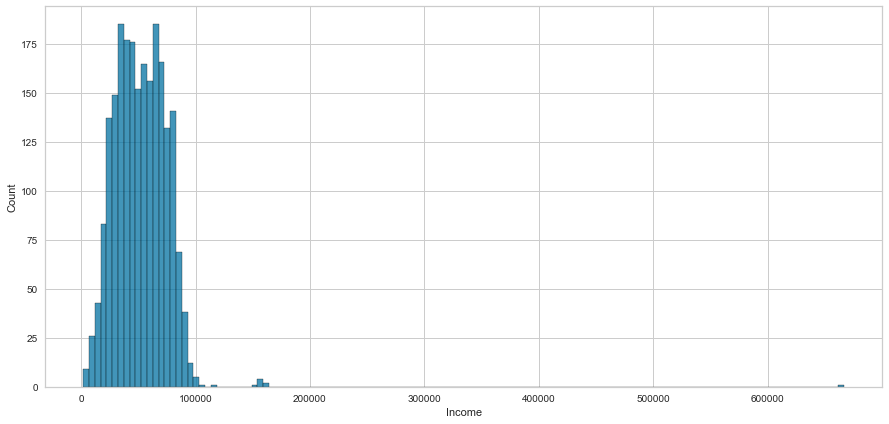

In [14]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x=data['Income'], data=data)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.** 

<AxesSubplot:xlabel='Income'>

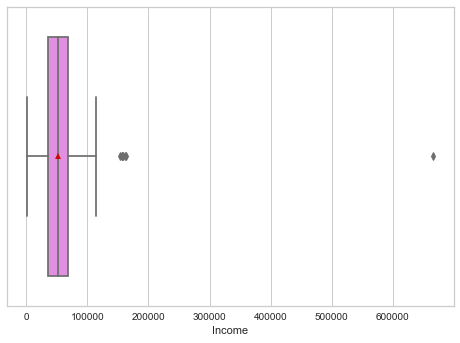

In [15]:
# Plot the boxplot
sns.boxplot(data=data, x=data['Income'], showmeans=True, color="violet")

#### **Observations and Insights: **

As observed in both the histogram and box plot, there are outliers to the right end of the distributions.  The histogram shows a right-skewed distribution.  The star in the box plot highlights the mean income value, which is very close to the middle quartile or median.  The box plot visualizes that the interquartile range is between 35303 and 68522.  This is where most of the values lie for the Income variable.

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [16]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                          # Finding the third quartile

IQR = Q3 - Q1                                       # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [17]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0


**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies? 

In [18]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.995)['Income']

102145.75000000003

#### **Observations and Insights: **

99.5% of the data for the Income variable is less than or equal to 102145.75000000003.  This means that the outliers for the Income variable can be removed.

In [19]:
# Dropping observations identified as outliers 
data.drop(index=[164, 617, 655, 687, 1300, 1653, 2132, 2233], inplace=True) # Pass the indices of the observations (separated by a comma) to drop them

**Now, let's check the distribution of the Income variable after dropping outliers.**

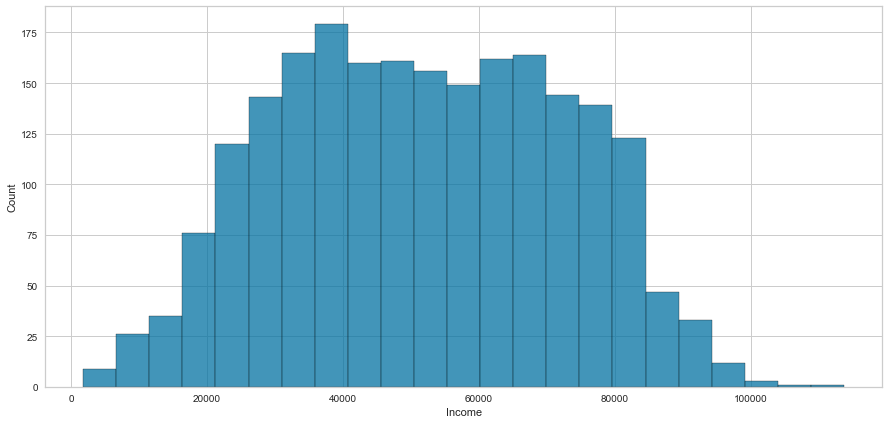

In [20]:
# Plot histogram and 'Income'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['Income'], data=data)
plt.show()

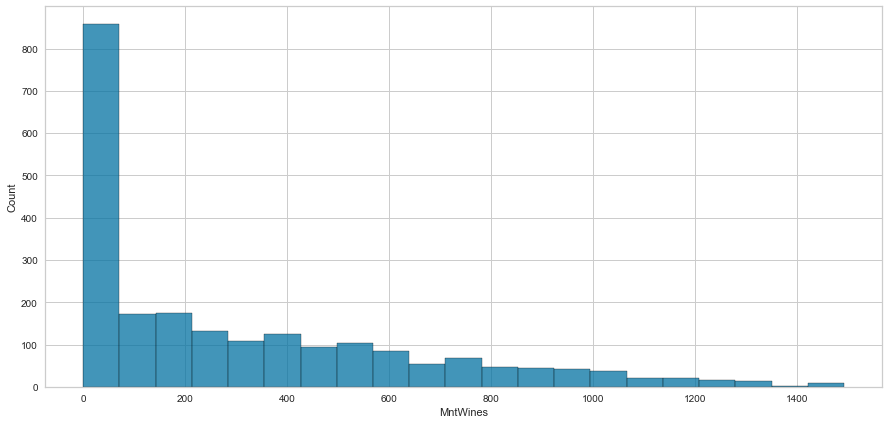

In [21]:
# Plot the histogram for 'MntWines'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntWines'], data=data)
plt.show()

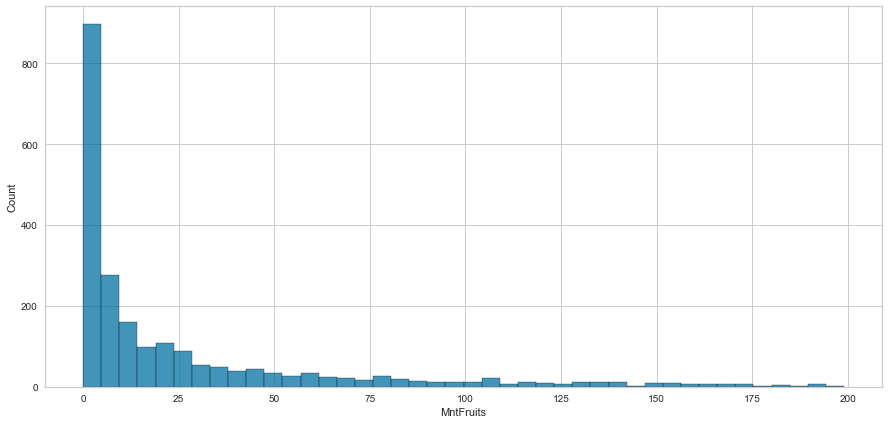

In [22]:
# Plot the histogram for 'MntFruits'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntFruits'], data=data)
plt.show()

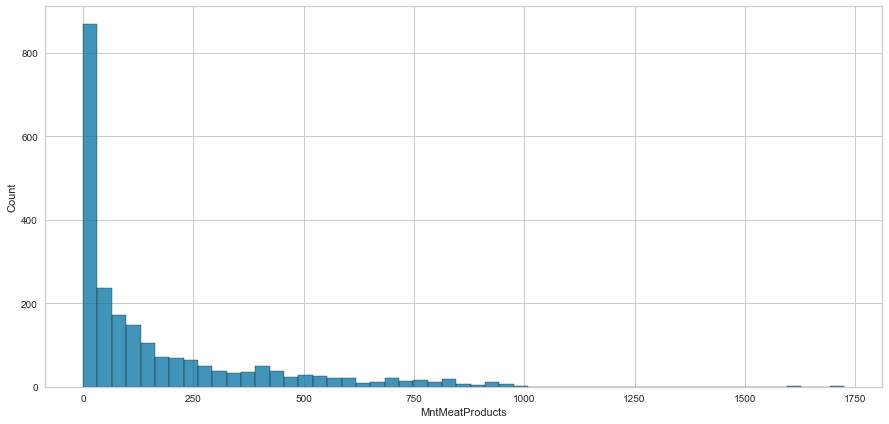

In [23]:
# Plot the histogram for 'MntMeatProducts' 

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntMeatProducts'], data=data)
plt.show()

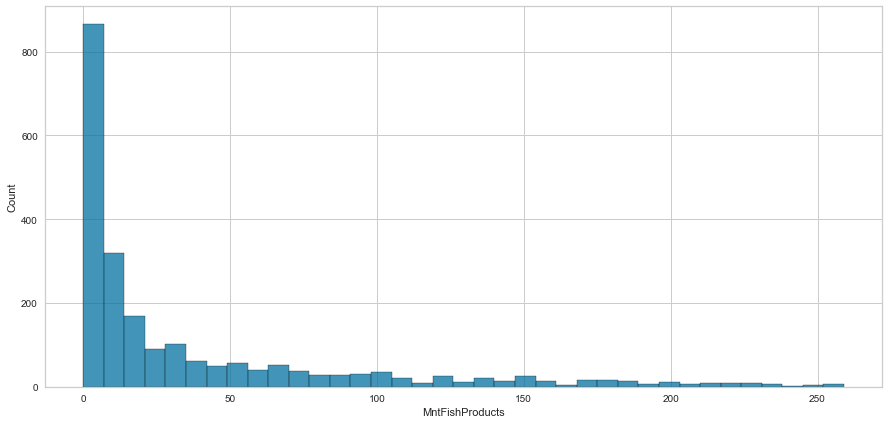

In [24]:
# Plot the histogram for 'MntFishProduct'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntFishProducts'], data=data)
plt.show()

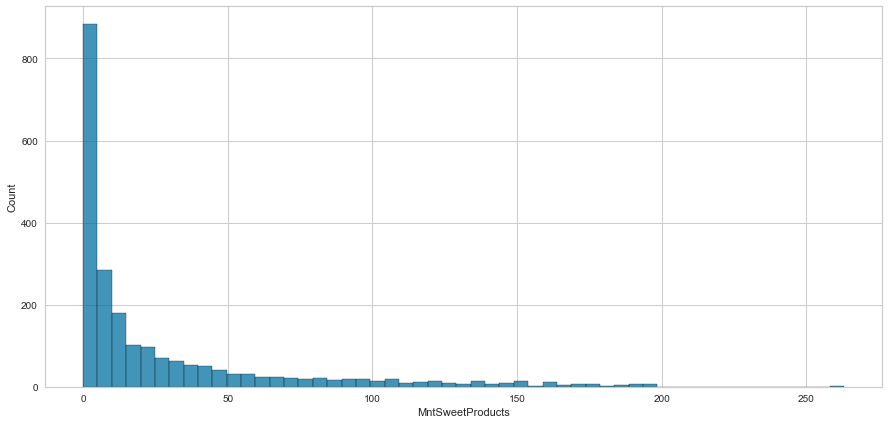

In [25]:
# Plot the histogram for 'MntSweetProducts'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntSweetProducts'], data=data)
plt.show()

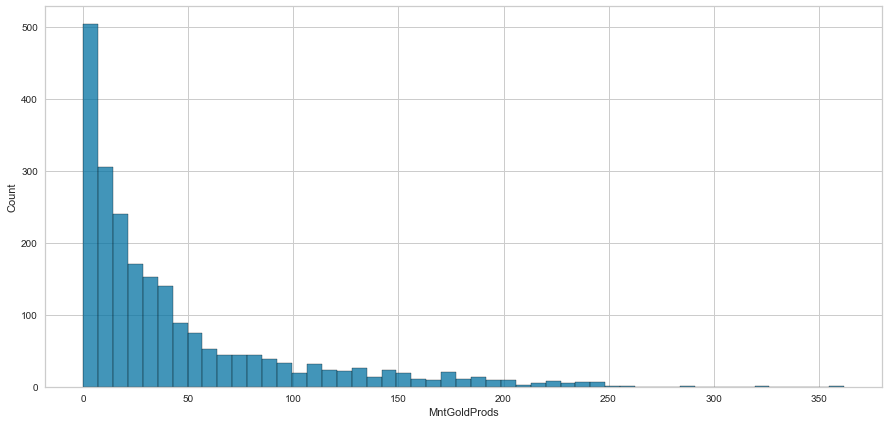

In [26]:
# Plot the histogram for 'MntGoldProducts'

plt.figure(figsize=(15, 7))
sns.histplot(x=data['MntGoldProds'], data=data)
plt.show()

#### **Note:** Try plotting histogram for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: **

- After dropping the outliers the histogram for Income shows a symmetrical distribution. 
- The other variables have a right-skewed distribution and appear to have outliers.

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [27]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

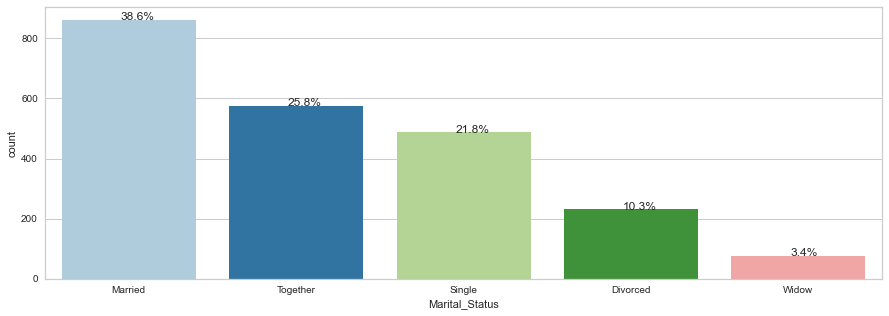

In [28]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

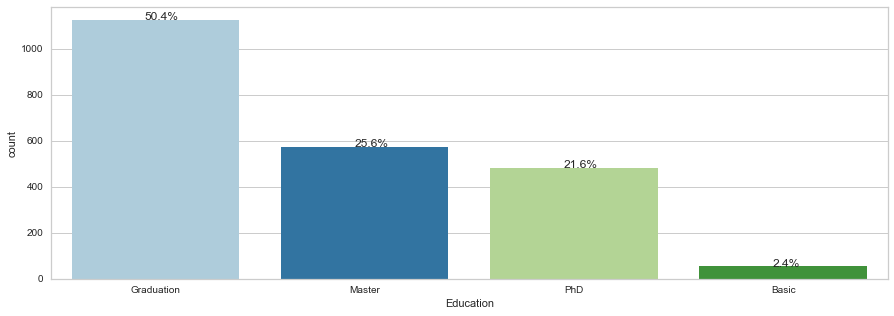

In [29]:
# Bar plot for 'Education'
perc_on_bar('Education')

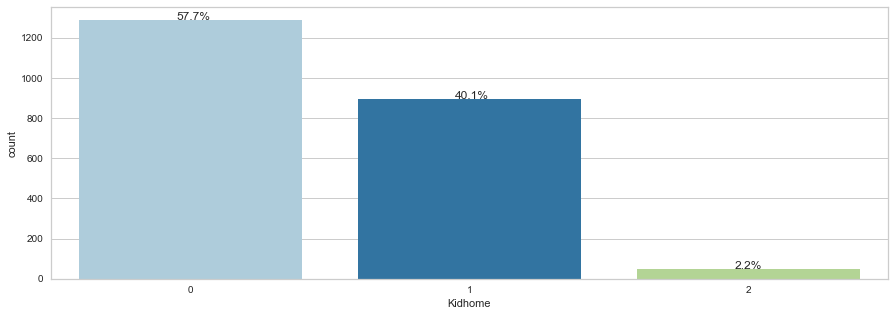

In [30]:
# Bar plot for 'Kidhome'
perc_on_bar('Kidhome')

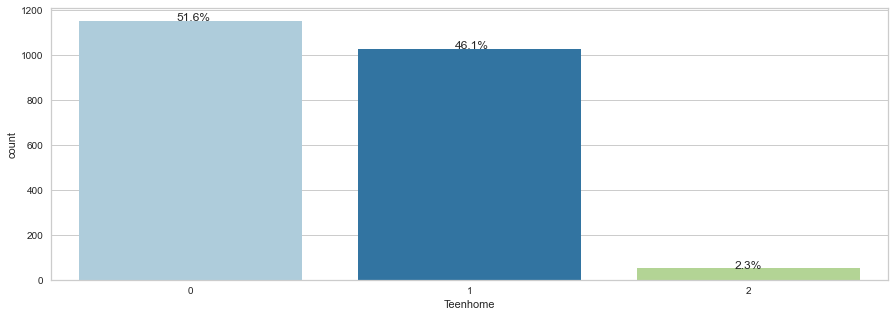

In [31]:
# Bar plot for 'Teenhome'
perc_on_bar('Teenhome')

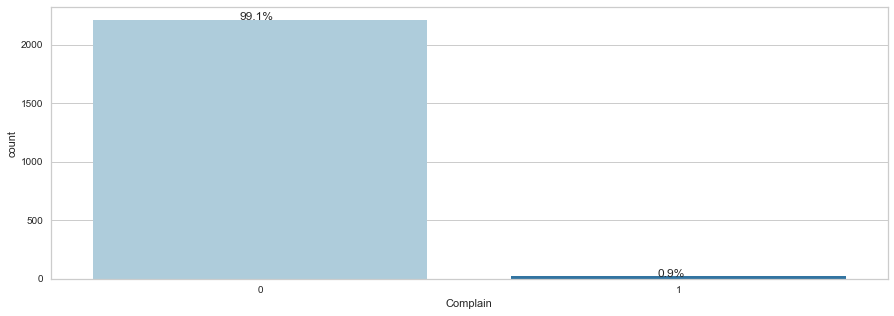

In [32]:
# Bar plot for 'Complain'
perc_on_bar('Complain')

#### **Observations and Insights from all plots: **

- Most of the customers are Married followed by Together or Single.
- Only 3.4% of the customers in this dataset have the marital status of Widow.
- A little more than half of the customers have a Graduation level of education.  Customers with a Master or PhD level of education almost make up the other half.
- Only 2.4% of the customers in this dataset have a Basic level of education.
- More than half (57.7%) of customers have 0 small children in their household.
- 40.1% of customers have 1 small child in their household and 2.2% have 2 small children.
- The distribution for number of teenagers in a customer's household is very similar to the distribution for number of small children in a customer's household.
- More than half (51.6%) of customers have 0 teenagers in their household.
- 46.1% of customer have 1 teenager in their household and 2.3% have 2 teenagers.
- Almost all the customers in this dataset have not complained in the last 2 years (99.1%).

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

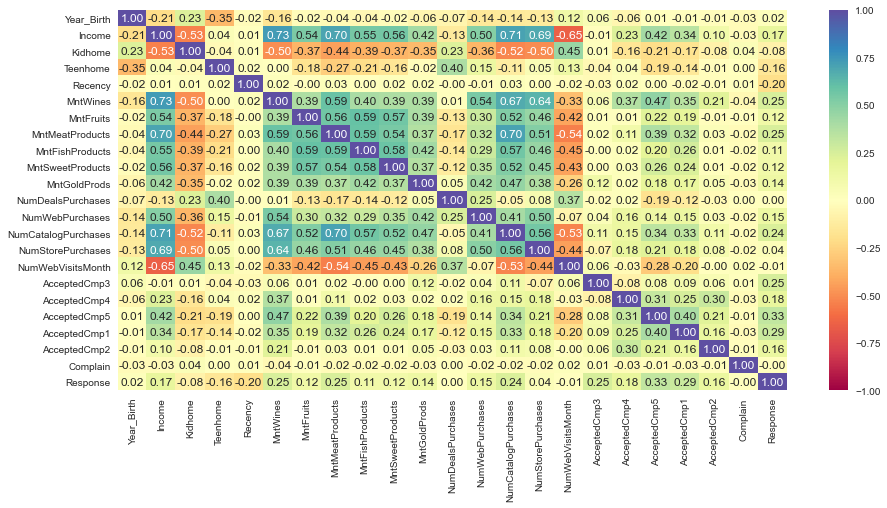

In [33]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

#### **Observations and Insights: **

- There is a moderate negative correlation between a customer's year of birth and number of teenagers in a customer's household.  This makes sense because if a customer is younger then their children (if they have any) will be younger as well and may not be teenagers yet.
- There is a negative correlation between income and number of small children in a customer's household.
- There is a strong positive correlation between income and amount spent on wine products and meat products in the last 2 years.  This makes sense because the larger the income a customer has, the more they can spend on these types of products.  This is further supported by the positive correlation between income and amount spent on fruit products, fish products, sweet products, and gold products in the last 2 years.
- It makes sense that there is a negative correlation between income and number of purchases made with discount because if a customer has a large income, they don't really need a discount to make purchases.
-  There is also a strong positive correlation between income and number of purchases using a catalog or directly in stores.  Furthermore, there is a moderate positive correlation between income and number of purchases made through the company's website.
- There is a strong negative correlation between income and number of visits to the company's website in the last month.
- The moderate negative correlation between number of small children in a customer's household and amount spent on wine products in the last 2 years makes sense since children can't drink wine.
- Customers with small children in the household have less number of purchases made using a catalog or directly in stores.  However, these customers have visit the company's website more in the last month, as displayed by the positive correlation between these two variables.
- There is a fairly strong positive correlation between amount spent on wine products in the last 2 years and number of purchases made using a catalog or directly in stores.  This may suggests how wine is typically puchased by customers.
- Customers who spend more on wine products also seem to spend more on meat products.
- It also appears that customers who spend more on fruit products spend more on meat, fish, and sweet products.
- There is a strong positive correlation between amount spent on meat products in the last 2 years and number of purchases made using a catalog.  
- Customers who spend more on meat products also spend more on fish and sweet products.
- Also, customers who spend more on fish products in the last 2 years appear to spend more on sweet products.
- There is a moderate negative correlation between number of purchases made using a catalog and number of visits to the company's website in the last month.  This may suggest that customers don't really use the company's website if they make purchases online.

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


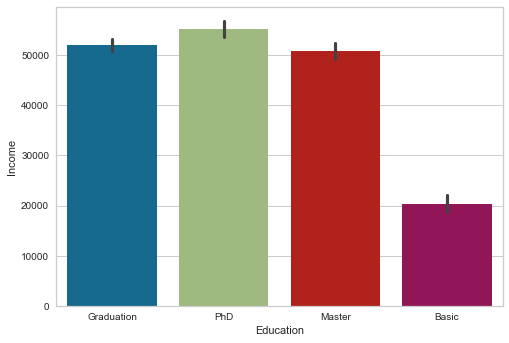

In [34]:
print(sns.barplot(x='Education', y='Income', data=data))

#### **Observations and Insights: **

- Customers generally have the same income if they have a Graduation or Master level of education.  However, customers with a PhD level of education have the highest income on average and customers with a Basic level of education have the lowest income on average.
- It makes sense that customers with a higher education make more money.

### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


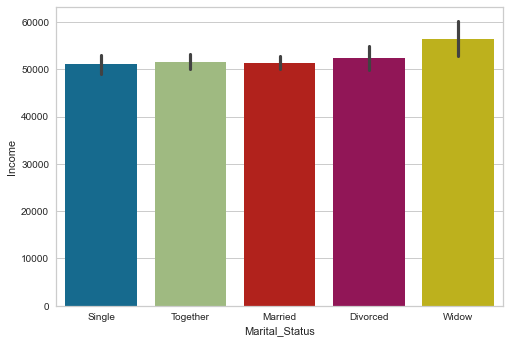

In [35]:
# Plot the bar plot for Marital_Status and Income

print(sns.barplot(x='Marital_Status', y='Income', data=data))

#### **Observations and Insights: **

- The customers seem to have a similar income on average regardless of their marital status.
- Customers with a Widow marital status seem to have a slightly higher income on average.

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


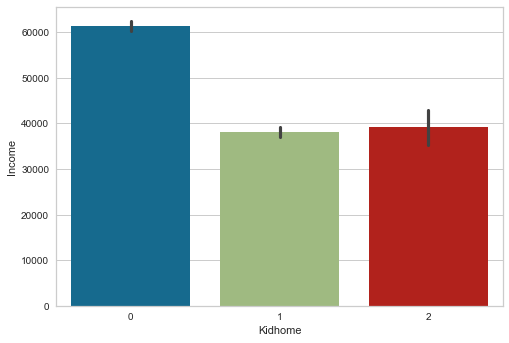

In [36]:
# Plot the bar plot for Kidhome and Income

print(sns.barplot(x='Kidhome', y='Income', data=data))

#### **Observations and Insights: **

- Customers with 0 small children in their household seem to have a higher income on average compared to those with 1 or 2 small children.

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

<AxesSubplot:xlabel='Marital_Status'>

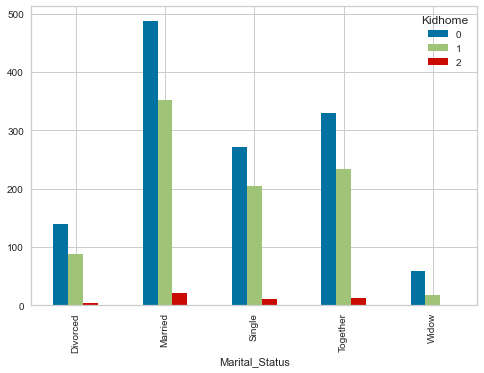

In [37]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(data.Marital_Status,data.Kidhome).plot(kind='bar',stacked=False)

#### **Observations and Insights: **

- Regardless of a customer's marital status, it seems that customers have either 0 or 1 small children in their household.
- Very few customers have 2 small children regardless of their marital status.
- There are approximately 490 customers with the marital status of Married with 0 small children.
- There doesn't appear to be any customers with the marital status of Widow that have 2 small children in their household.

## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

**Think About It:**

- The Year_Birth column in the current format might not be very useful in our analysis. The Year_Birth column contains the information about Day, Month, and year. Can we extract the age of each customer?
- Are there other columns which can be used to create new features?

### **Age** 

In [38]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

#### **Observations and Insights: **

- When the data was collected in 2016, the ages of the customers in this dataset range from 20 to 123. 

**Think About It:**

- We could observe from the above output that there are customers with an age greater than 115. Can this be true or a data anomaly? Can we drop these observations?

In [39]:
# Drop the observations with age > 115
# Hint: Use drop() method with inplace=True

data.drop(index=[192, 339, 239], inplace=True) 

**Now, let's check the distribution of age in the data.**

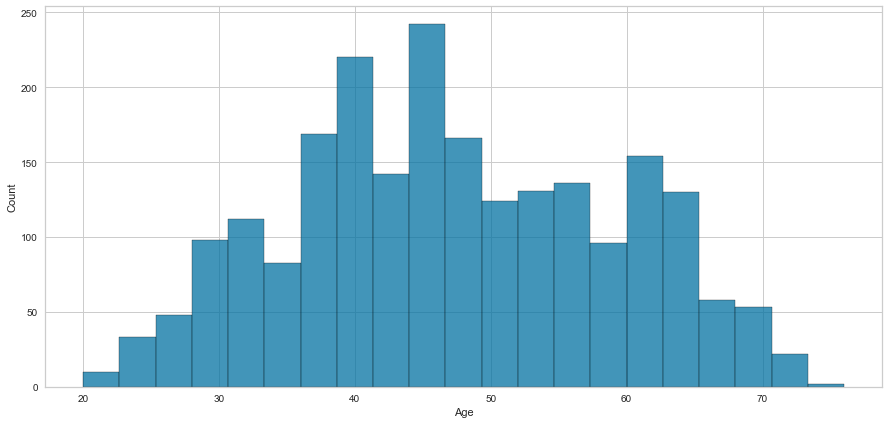

In [40]:
# Plot histogram to check the distribution of age

plt.figure(figsize=(15, 7))
sns.histplot(x=data['Age'], data=data)
plt.show()

#### **Observations and Insights: **

The age variable seems to have a relatively symmetrical distribution.  The ages of the customers seem to primarily fall between 39 to 57.

### **Kids** 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [41]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data['Kidhome'] + data['Teenhome']

### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [42]:
# Check the unique categories in Marial_Status

print(data["Marital_Status"].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [43]:
# Replace "Married" and "Together" with "Relationship"

data = data.replace({'Married':'Relationship','Together':'Relationship'})

In [44]:
# Replace "Divorced" and "Widow" with "Single"

data = data.replace({'Divorced':'Single','Widow':'Single'})

In [45]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data["Marital_Status"].replace({'Single': 1, 'Relationship': 2}) 

In [46]:
# Add two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data['Status'] + data['Kids']

### **Expenses** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [47]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [48]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [49]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data.Dt_Customer) 

**Let's check the max and min of the date.**

In [50]:
# Check the minimum of the date
# Hint: Use the min() method

data["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [51]:
# Check the maximum of the date
# Hint: Use the max() method

data["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

**Think About It:**
- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. Can we extract the number of days a customer has been with the company using some date as the threshold? Can January 1st, 2015 be that threshold?

In [52]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [53]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [54]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [55]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data['Expenses'] / data['NumTotalPurchases']

**Now, let's check the maximum value of the AmountPerPurchase.**

In [56]:
# Check the max value
# Hint: Use max() function

data['AmountPerPurchase'].max()

inf

**Think About It:**

- Is the maximum value in the above output valid? What could be the potential reason for such output?
- How many such values are there? Can we drop such observations?

In [57]:
# Find how many observations have NumTotalPurchases equal to 0

data['NumTotalPurchases'].sort_values() == 0

981      True
1524     True
2214    False
774     False
2228    False
        ...  
627     False
1252    False
412     False
432     False
21      False
Name: NumTotalPurchases, Length: 2229, dtype: bool

In [58]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices

data.drop(index=[981, 1524], inplace = True)

**Now, let's check the distribution of values in AmountPerPurchase column.**

In [59]:
# Check the summary statistics of the AmountPerPurchase variable 

data['AmountPerPurchase'].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

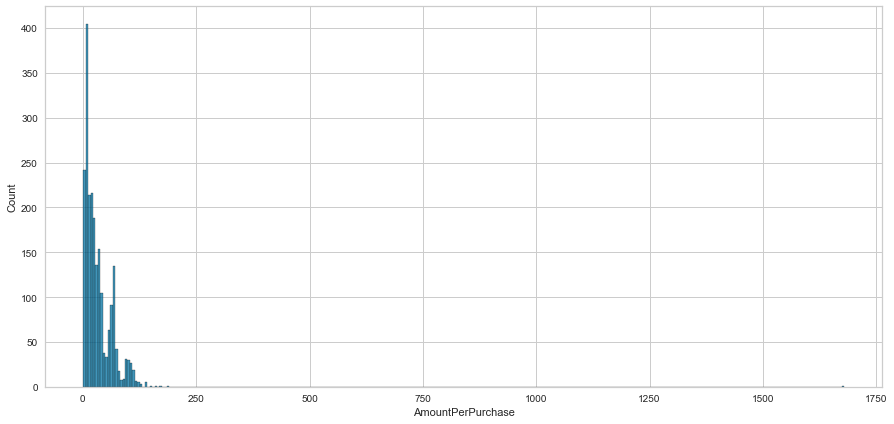

In [60]:
# Plot the histogram for the AmountPerPurchas variable

plt.figure(figsize=(15, 7))
sns.histplot(x=data['AmountPerPurchase'], data=data)
plt.show()

#### **Observations and Insights: **

- The histogram for AmountPerPurchase shows a right-skewed distribution with many outliers. 
- It seems like most of the values lie between 9.714286 and 45.281773.
- The standard deviation of 45.040897 suggests that there is a good amount of variability when it comes to the amount spent per purchase.
- The average amount spent per purchase is 33.274270.
- The max amount spent per purchase is 1679 and the minimum is 0.533333.

### **Imputing Missing Values**

In [61]:
# Impute the missing values for the Income variable with the median

data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
count,2227.000000,2203.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.00000,...,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,1968.888639,51665.163867,0.444544,0.507858,49.116300,305.263583,26.371352,165.431522,37.675797,27.18590,...,0.149978,47.111361,0.952402,1.644814,2.597216,606.079928,14.882353,538.213740,0.448586,33.274270
std,11.712074,20673.032217,0.538667,0.544767,28.952535,336.790652,39.774657,219.379791,54.713778,41.34949,...,0.357130,11.712074,0.752043,0.478677,0.907120,601.032876,7.612563,232.269241,0.890416,45.040897
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,20.000000,0.000000,1.000000,1.000000,8.000000,1.000000,26.000000,0.000000,0.533333
25%,1959.000000,35221.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.00000,...,0.000000,39.000000,0.000000,1.000000,2.000000,69.000000,8.000000,367.000000,0.000000,9.714286
50%,1970.000000,51315.000000,0.000000,0.000000,49.000000,177.000000,8.000000,68.000000,12.000000,8.00000,...,0.000000,46.000000,1.000000,2.000000,3.000000,397.000000,15.000000,539.000000,0.000000,23.352941
75%,1977.000000,68298.500000,1.000000,1.000000,74.000000,505.000000,33.000000,231.500000,50.000000,34.00000,...,0.000000,57.000000,1.000000,2.000000,3.000000,1044.500000,21.000000,712.000000,1.000000,45.281773
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.00000,...,1.000000,76.000000,3.000000,2.000000,5.000000,2525.000000,43.000000,1089.000000,5.000000,1679.000000


In [62]:
data['Income'] = data['Income'].replace(np.nan, 51315.000000)

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

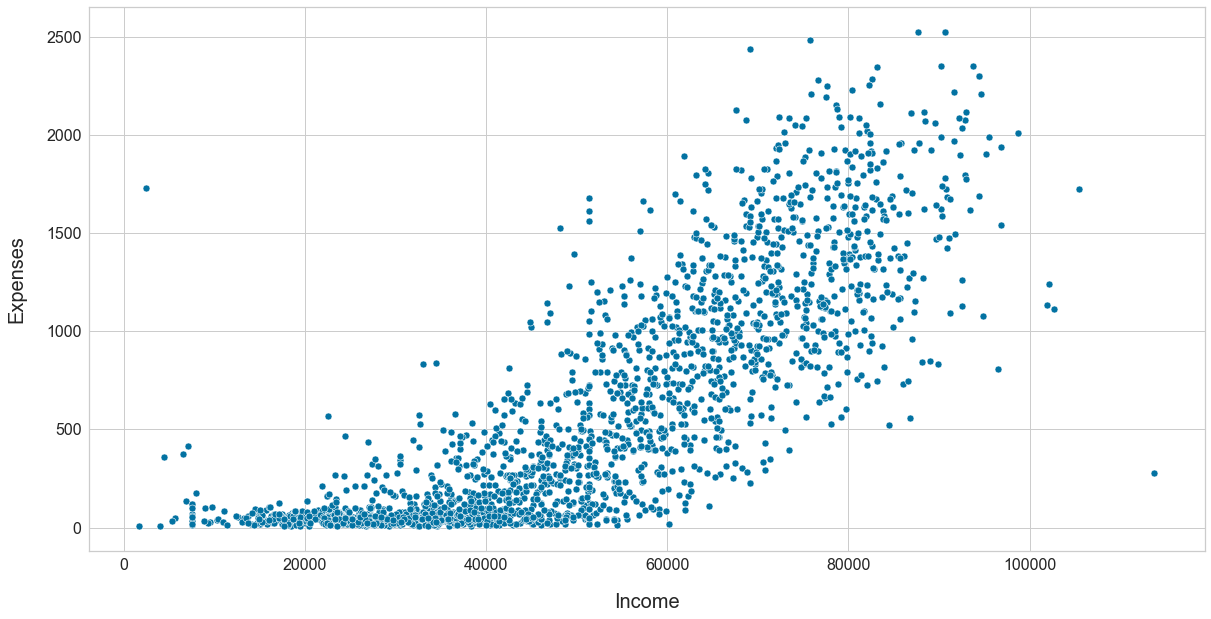

In [63]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = 'Income', y = 'Expenses', data = data)                                        # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights: **

There is a strong positive association between Income and Expenses, which means that the higher a customer's income is, the higher their expenses are.  This makes sense because if a customer has more money, they probably spend more money as well with the exception of some outliers.

### **Family Size Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


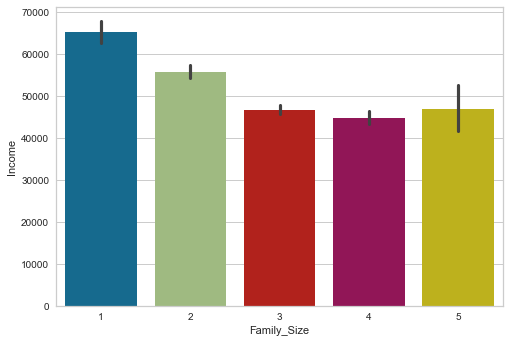

In [64]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis

print(sns.barplot(x='Family_Size', y='Income', data=data))

#### **Observations and Insights: **

- On average, families with one person have the highest income of approximately 65000.  This is followed by families with 2 people.
- It seems like families with 3 or 4 people generally have a lower income on average.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
    - Visualize data using histograms, box plots, bar plots, correlation heat maps, and scatter plots
    - Univariate analysis and Bivariate analysis
    - Scale the data
    - T-SNE
    - Principal Component Analysis (PCA)
    - Cluster Profiling
        - K-Means, K-Medoids, Hierarchical Clustering, DBSCAN, Gaussian Mixture Model


    
- **Overall solution design -** What is the potential solution design?
    - Check the dimensions of the dataframe in terms of rows and columns
    - Check data types are correct and change data types accordingly if necessary
    - Study summary of statistics
    - Drop unnecessary variables
    - Check and impute missing values 
    - Study correlation
    - Detect outliers and remove if necessary
    - Create new variables and groupings


    
    
- **Measures of success -** What are the key measures of success?
    - Elbow Method of showing the optimal k
    - Silhouette Score
    - Cophenetic Correlation

In [65]:
data.to_csv('marketing_campaign_milestone2.csv', index=False)